In [35]:
import pandas as pd

files = {
    "2020": "2020.csv",
    "2021": "2021.csv",
    "2022": "2022.csv",
    "2023": "2023.csv",
    "2024": "2024.csv",
}

df_list = []
for year, file in files.items():
    temp_df = pd.read_csv(file)
    temp_df["Year"] = int(year)
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)
print(df.head())


  Country name  Happiness Rank  Happiness score  Upperwhisker  Lowerwhisker  \
0      Finland               1             7.81          7.87          7.75   
1      Denmark               2             7.65          7.71          7.58   
2  Switzerland               3             7.56          7.63          7.49   
3      Iceland               4             7.50          7.62          7.39   
4       Norway               5             7.49          7.56          7.42   

   Economy (GDP per Capita)\t  Social support  Healthy life expectancy  \
0                        1.29            1.50                     0.96   
1                        1.33            1.50                     0.98   
2                        1.39            1.47                     1.04   
3                        1.33            1.55                     1.00   
4                        1.42            1.50                     1.01   

   Freedom to make life choices  Generosity  Perceptions of corruption  Year  
0

In [36]:
print(df.shape)

(728, 12)


In [37]:
print(df.columns)

Index(['Country name', 'Happiness Rank', 'Happiness score', 'Upperwhisker',
       'Lowerwhisker', 'Economy (GDP per Capita)\t', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')


In [38]:
string_columns = ['Country name']

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in string_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [39]:
print(df.isnull().sum())

Country name                    0
Happiness Rank                  0
Happiness score                 0
Upperwhisker                    0
Lowerwhisker                    0
Economy (GDP per Capita)\t      3
Social support                  3
Healthy life expectancy         4
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Year                            0
dtype: int64


In [40]:
df.fillna(df.mean(), inplace=True)

In [41]:
print(df.isnull().sum())

Country name                    0
Happiness Rank                  0
Happiness score                 0
Upperwhisker                    0
Lowerwhisker                    0
Economy (GDP per Capita)\t      0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Year                            0
dtype: int64


In [42]:
print(df.dtypes)

Country name                      int64
Happiness Rank                    int64
Happiness score                 float64
Upperwhisker                    float64
Lowerwhisker                    float64
Economy (GDP per Capita)\t      float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Year                              int64
dtype: object


In [43]:
print(df.info)

<bound method DataFrame.info of      Country name  Happiness Rank  Happiness score  Upperwhisker  \
0              51               1            7.810         7.870   
1              42               2            7.650         7.710   
2             155               3            7.560         7.630   
3              67               4            7.500         7.620   
4             126               5            7.490         7.560   
..            ...             ...              ...           ...   
723            36             139            3.295         3.462   
724           143             140            3.245         3.366   
725            88             141            3.186         3.469   
726            87             142            2.707         2.797   
727             0             143            1.721         1.775   

     Lowerwhisker  Economy (GDP per Capita)\t  Social support  \
0           7.750                       1.290           1.500   
1           7.580    

In [44]:
print(df.describe())

       Country name  Happiness Rank  Happiness score  Upperwhisker  \
count    728.000000      728.000000       728.000000    728.000000   
mean      89.795330       73.401099         5.524740      5.640658   
std       52.200024       42.232618         1.113797      1.095239   
min        0.000000        1.000000         1.721000      1.775000   
25%       45.000000       37.000000         4.770000      4.905000   
50%       87.000000       73.000000         5.583000      5.689500   
75%      135.000000      110.000000         6.325500      6.430750   
max      179.000000      153.000000         7.842000      7.904000   

       Lowerwhisker  Economy (GDP per Capita)\t  Social support  \
count    728.000000                  728.000000      728.000000   
mean       5.408864                    1.200348        1.026796   
std        1.133577                    0.473101        0.332633   
min        1.667000                    0.000000        0.000000   
25%        4.648500               

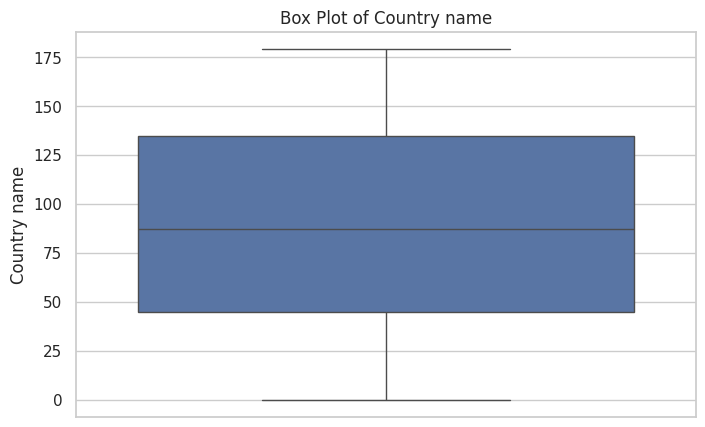

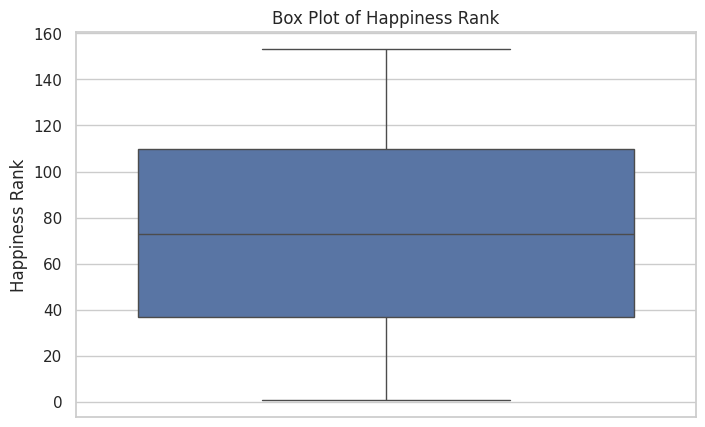

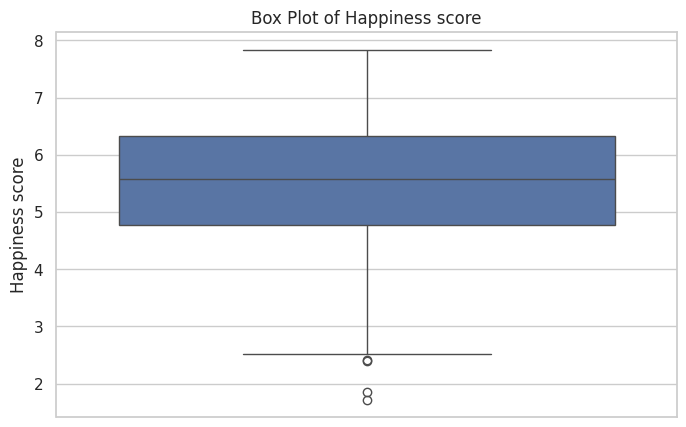

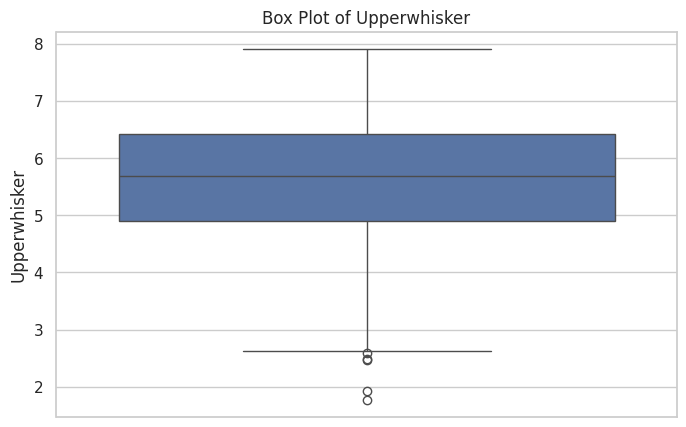

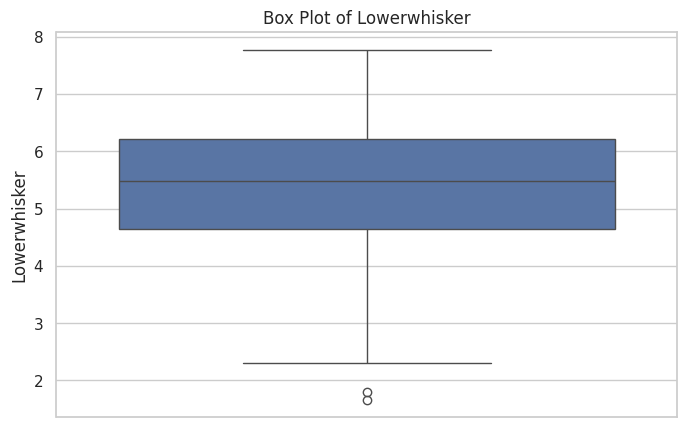

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


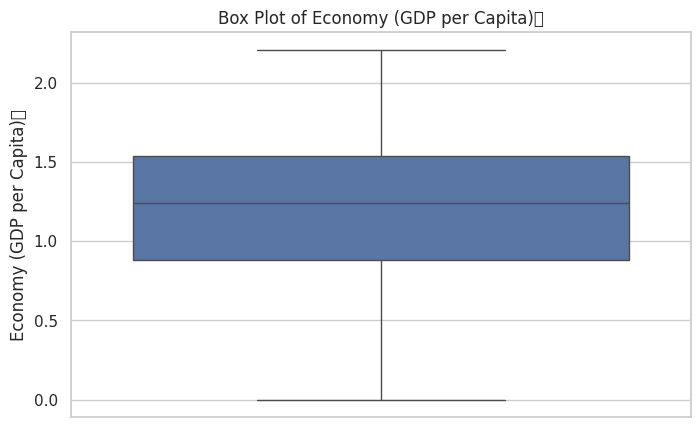

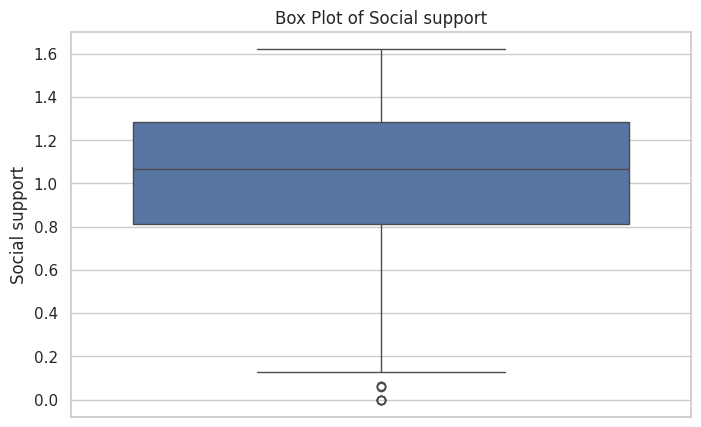

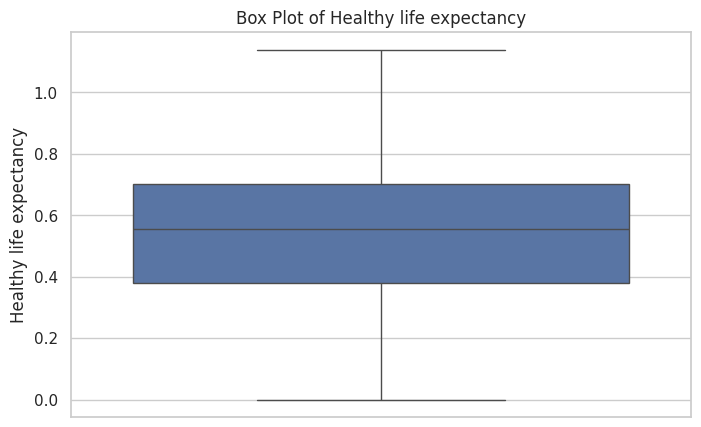

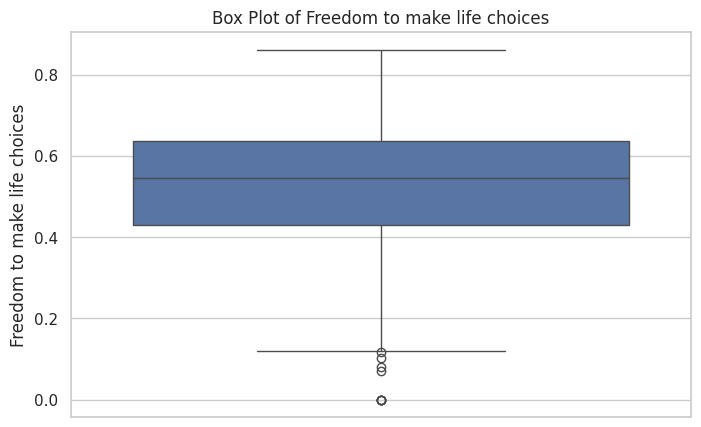

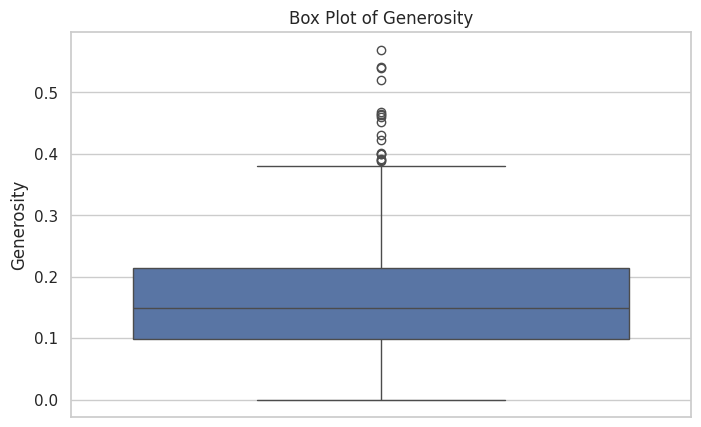

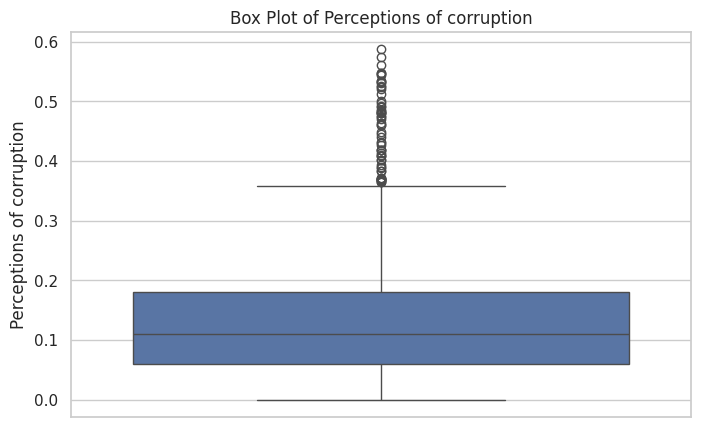

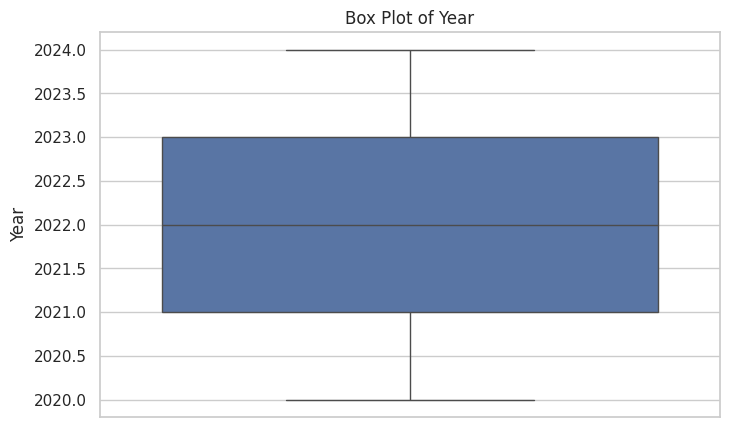

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# Get numerical columns
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Generate box plots for each column separately
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


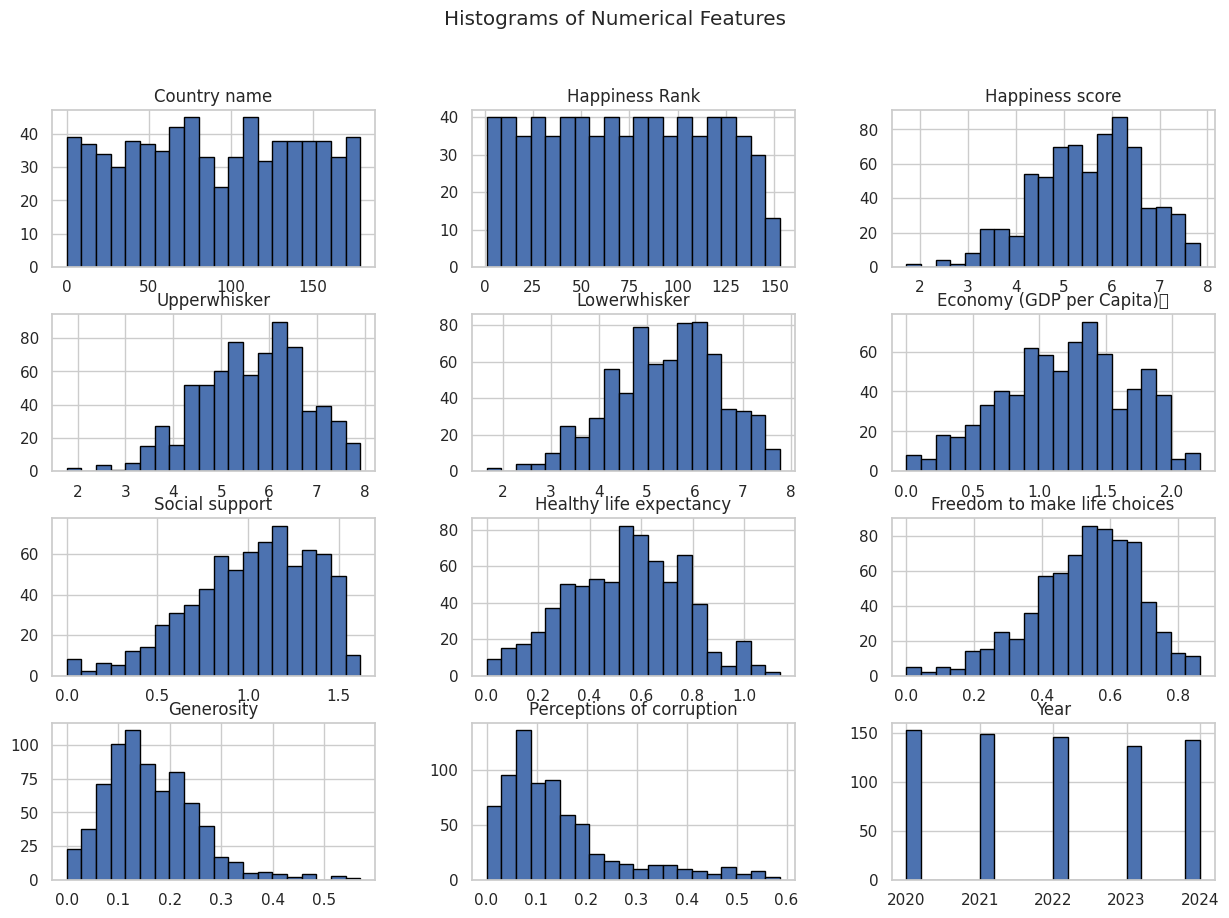

In [46]:
df[numerical_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


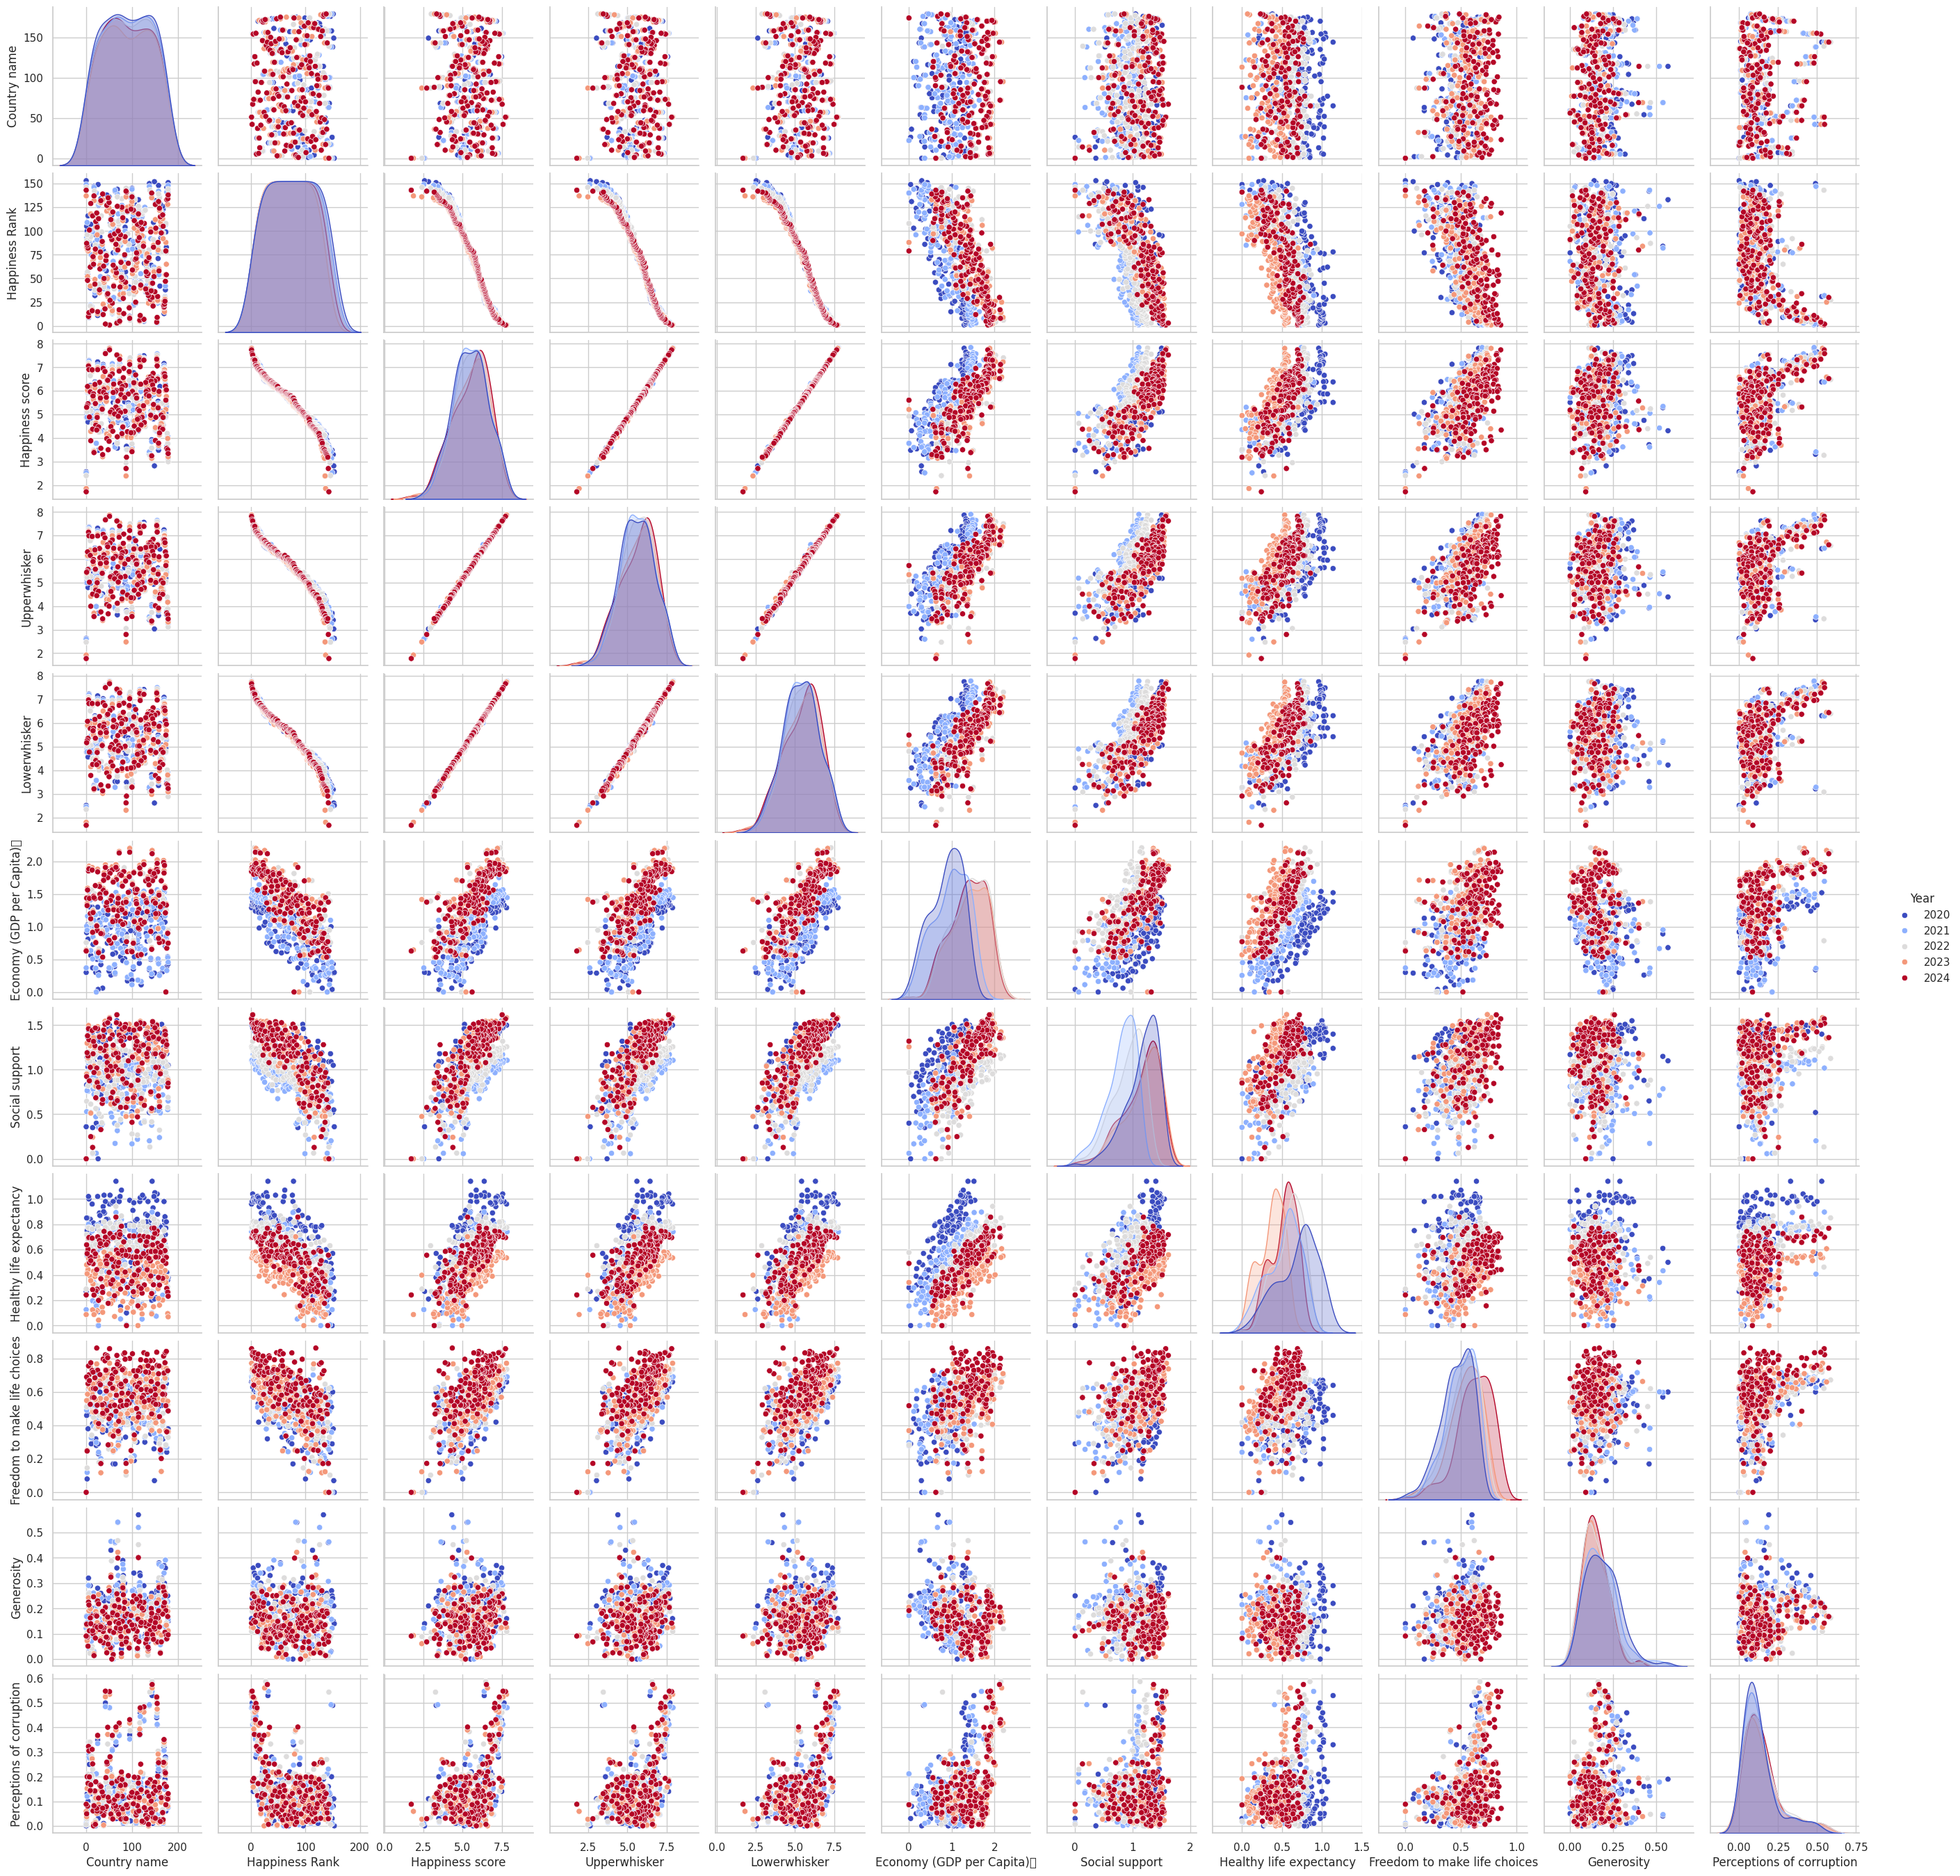

In [47]:
sns.pairplot(df[numerical_cols], hue="Year", palette="coolwarm")
plt.show()

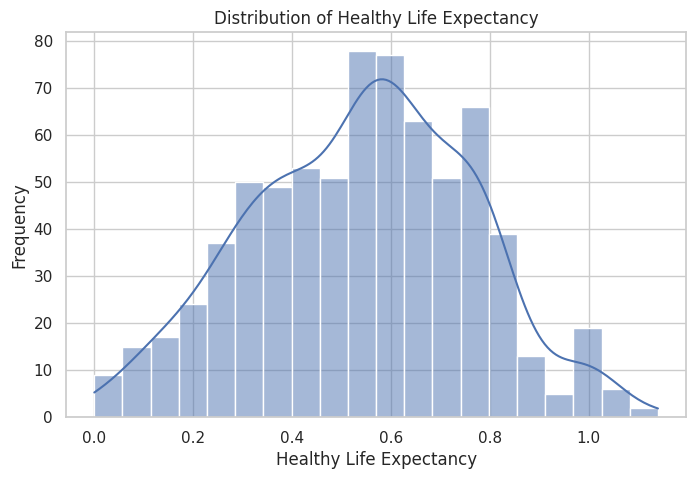

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=20, kde=True)
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Frequency")
plt.title("Distribution of Healthy Life Expectancy")
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(columns=["Healthy life expectancy"])
y = df["Healthy life expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0109


In [50]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.7885


In [51]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr:.4f}")


Linear Regression MSE: 0.0178


In [52]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_lr)
print(f"R² Score: {r2:.4f}")


R² Score: 0.6554


In [53]:
import numpy as np

feature_importance = model.feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(feature_importance)[::-1]

print("Feature Importance Ranking:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")


Feature Importance Ranking:
Lowerwhisker: 0.3972
Year: 0.2453
Economy (GDP per Capita)	: 0.1343
Social support: 0.0563
Perceptions of corruption: 0.0317
Freedom to make life choices: 0.0306
Country name: 0.0272
Generosity: 0.0244
Happiness score: 0.0227
Happiness Rank: 0.0204
Upperwhisker: 0.0101


In [54]:
train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)

print(f"Train MSE: {train_mse:.4f}, Test MSE: {mse:.4f}")


Train MSE: 0.0015, Test MSE: 0.0109


In [55]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))